# Advanced Laboratories Data Analysis Week 2 

There are two main aims to this exercise:
 1. Perform non-linear curve fitting using the **<samp>scipy.stats.curve_fit()</samp>** function.
 2. Introduce the $\chi^2$ statistic and use it to assess the quality of a fit though the reduced $\chi^2$ and $\chi^2$ probability

At the end of this session you should be able to:

1. Use the Python scipy curve_fit_ function, including providing guesses for the initial fit parameters. Usage:
```python
popt, pcov=curve_fit(func, x, y, p0=guess, sigma=yerror, absolute_sigma=True)```
2. Calculate and understand the significances of $\chi^2$, the reduced $\chi^2$ and the $\chi^2$ probability.

# Tiernan O'Neill 18383616

### Problem and Data Set
This week you will be interested in data associated with the calibration of a thermocouple. 

The data is in a file called __thermocouple.dat__ and should be downloaded to your working directory before you begin. 
 * The *first column is temperature readings in degrees C* 
 * The *second is the measured relative output voltage in mV*. The uncertainty in each of the mV readings is 0.05 mV.
 
The calibration curve is not a straight line but needs a quadratic term added to adequately describe it. In this exercise both linear and quadratic functions will be fit and the goodness of fit for each compared.

## Background 

<a id='nlfit_cell'></a>

### Non-linear curve fitting

The scipy function <samp>curve_fit()</samp> is used to perform the non-linear curve fitting.

Non-linear fitting generally using an algorithm such as the [Levenberg–Marquardt algorithm](https://en.wikipedia.org/wiki/Levenberg–Marquardt_algorithm) to find the parameters which minimise the differences between a fitted curve and the data. However, such algorithms typically only find local minima. Hence, **it is vital to give the algorithm starting values for the best-fit parameter which are close to the optimum values** (option <samp>"p0= "</samp> in <samp>curve_fit()</samp>).

Thus the procedure for performing a non-linear fit should be: 
 * plot data points
 * plot curve to be fit with initial guesses for parameters and adjust if needed until they are in right region
 * perform fit and then plot the data again with the best-fit curve overlaid

<a id='csq_cell'></a>

### $\chi^2$ and goodness of fit

$\chi^2$ is a statistic that characterises the dispersion of the observed values from the 
expected ones and is defined as: 
$$\chi^2 = \sum_{i=1}^{N}{\left(\frac{measured_i - expected_i}{error_i}\right)^2}$$

Therefore we might expect for good agreement that the measured spread would be approximately equal to the expected spread and that we should get a contribution of approximately 1 from each point. A good fit would then have $\chi^2$ approximately equal to the number of data points ($N$). In actual fact  

$$\chi^2 \approx \nu = N -n_c$$  
where $n_c$ is the number of constraints derived from the data (free parameters in the fit). $\nu$ and is known as the __number of degrees of freedom (d.o.f.)__. So we would expect the reduced $\chi^2$ ($\frac{\chi^2}{\nu}$) to be approximately 1. 

It is rare to get a value for the reduced $\chi^2$ is of exactly 1. If the value is <<1 then it means that the error bars have probably been overestimated. If it is >1 then the data and fitted curve do not agree perfectly, which can happen due to statistical fluctuations. The question: *how much > 1 can the reduced $\chi^2$ value be and still be acceptable?* depends strongly on the number of d.o.f. In general, the probability (P-value) for obtaining the observed $\chi^2$ for $\nu$ degrees of freedom within statistical flutuations can be calculated by (note: there is a different $\chi^2$ probability curve for each d.o.f.):

$$P = \int_{\chi^2_{observed}}^\infty \chi^2(x,\nu)\,dx$$

The above  $\chi^2$ P-value can be calculated in Python using the [scipy.stats.chi2.sf()](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.chi2.html) which is the *survival function*.
Use by:
```python
from scipy.stats import chi2
P=chi2.sf(χ2_value, ν)
```

## 1) Prepare data
<font color="blue"> Load in the data and extract the columns into appropriate variable names and make a matching numpy array for the errors on the voltages.</font>

In [1]:
# Solution for preparing the data 

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

data=np.loadtxt('C:/Users/tiern/OneDrive/Documents/PHYC30320/Data Analysis exercises/thermocouple.dat')
temp=data[:,0]
vol=data[:,1]
volerr=0.05*np.ones(len(vol))

## 2) Linear fit

<font color="blue">Plot the data points with errorbars and the linear fit function (which you will have to create) with the initial guess values for the parameters</font>

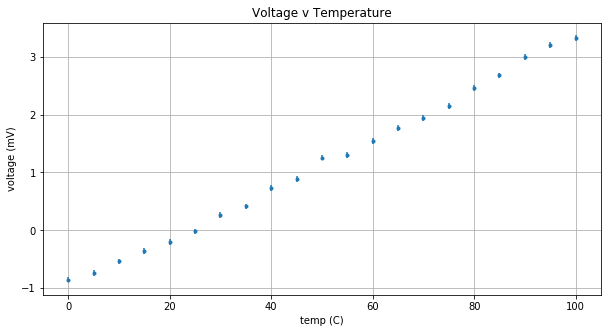

In [2]:
# Solution for plotting data and initial guess

plt.figure(figsize=(10,5))
plt.errorbar(temp,vol,yerr=volerr,fmt='.')
plt.xlabel('temp (C)')
plt.ylabel('voltage (mV)')
plt.title('Voltage v Temperature')
plt.grid();

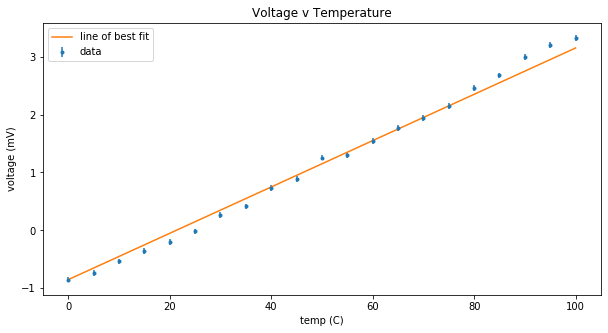

In [3]:
# intial guesses are c=-0.85mV and m=0.04

from scipy.optimize import curve_fit

def func(x, m, c):
    return m*x + c

plt.figure(figsize=(10,5))
x=np.linspace(0,100,1000)

plt.errorbar(temp,vol,yerr=volerr,fmt='.', label='data')
plt.plot(x,func(x,0.04,-0.85), label='line of best fit')
plt.xlabel('temp (C)')
plt.ylabel('voltage (mV)')
plt.title('Voltage v Temperature')
plt.legend();

<font color="blue">Use <samp>**scipy.optimize.curvefit()**</samp> to fit a straight line to the data. Give the fitting function an initial guess at the parameters (see [non-linear-fitting cell above](#nlfit_cell)). Be sure to include the y-errors in the call of the fitting function so that the fit is weighted. Plot the data with error bars, the line using the intial guess parameters (this is good practice to see that the guess is reasonable) and the line of best fit through the data. Recall,  command is **<samp>popt, pcov=curve_fit(func, x, y, p0=guess, sigma=yerror, absolute_sigma=True)</samp>** </font>

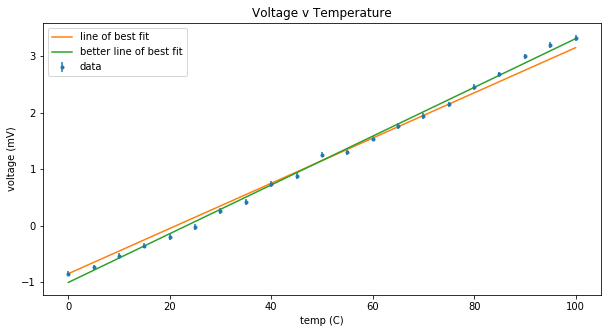

In [4]:
# Solution for plotting data and best-fit curve   

guess=np.array([0.04,-0.85])
popt, pcov=curve_fit(func, temp, vol, p0=guess, sigma=volerr, absolute_sigma=True)
x=np.linspace(0,100,1000)
yfit=func(x, popt[0], popt[1])

plt.figure(figsize=(10,5))
plt.errorbar(temp,vol,yerr=volerr,fmt='.', label='data')
plt.plot(x,func(x,0.04,-0.85), label='line of best fit')
plt.plot(x,yfit, label='better line of best fit')
plt.xlabel('temp (C)')
plt.ylabel('voltage (mV)')
plt.title('Voltage v Temperature')
plt.legend();

## 3) Goodness of fit: linear fit

Make sure you have read and understand the [χ2 cell above](#csq_cell)

<font color="blue"> Calculate the $\chi^2$ value, reduced $\chi^2$ and $\chi^2$ P-value for the linear fit to the data. It might be useful to make your own function for calculating the $\chi^2$ sum. Do the resulting values indicate the fit is good?</font>

In [5]:
# Solution for calculating χ2 sum, reduced χ2 and χ2 P-value for linear function

from scipy.stats import chi2 

def chi2func(x,y,yerr):
    yexpected=func(x, popt[0], popt[1])
    return np.sum(np.square((y-yexpected)/yerr))

a=chi2func(temp,vol,volerr)   # chi2 value
v=len(vol)-2   # number of constraints = 2
rchi2=a/v   # reduced chi2 value
P=chi2.sf(a, v)  # P value

print('chi2=' ,a)
print('reduced chi2=' ,rchi2)
print('P-value=' ,P)

chi2= 43.46710510822516
reduced chi2= 2.287742374117114
P-value= 0.0011185548731342265


The value of rchi is greater than 1, which tells us that the data and the curve do not perfectly agree, this is evident by the previous graph. The P value is almost 0, which also tells us that the fitted curve does not match the data well.

## 4) Try fit as quadratic polynomial

A different model for the thermocouple data might be a quadratic of the form: 

$$V = a_0 +a_1T + a_2T^2$$

<font color='blue'>Use curve_fit to fit a quadratic function to the data. Plot the data, your initial guess and the quadratic fit. </font>

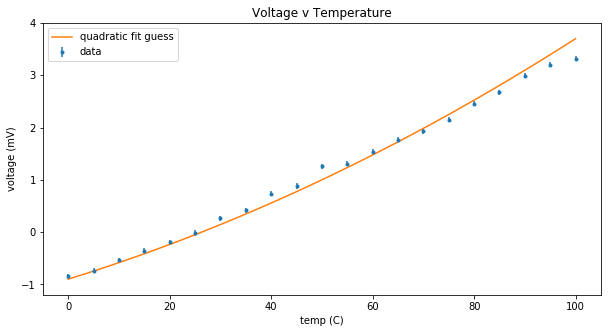

In [6]:
# Solution for quadratic - inital guess

V=-0.9+0.03*x+0.00016*(x)**2 

plt.figure(figsize=(10,5))
plt.errorbar(temp,vol,yerr=volerr,fmt='.', label='data')
plt.plot(x,V, label='quadratic fit guess')
plt.xlim(-5,105)
plt.ylim(-1.2,4)
plt.xlabel('temp (C)')
plt.ylabel('voltage (mV)')
plt.title('Voltage v Temperature')
plt.legend();

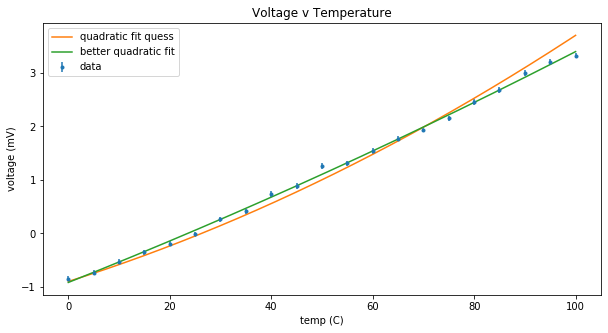

In [7]:
# Solution for quadratic - best fit

def quadfunc(x, a, b, c):
    return a*x**2 + b*x + c

quadguess=np.array([0.00016,0.03,-0.9])
quadpopt, quadpcov=curve_fit(quadfunc, temp, vol, p0=quadguess, sigma=volerr, absolute_sigma=True)
yfitquad=quadfunc(x, quadpopt[0], quadpopt[1], quadpopt[2])

plt.figure(figsize=(10,5))
plt.errorbar(temp,vol,yerr=volerr,fmt='.', label='data')
plt.plot(x,V, label='quadratic fit quess')
plt.plot(x,yfitquad, label='better quadratic fit')
plt.xlabel('temp (C)')
plt.ylabel('voltage (mV)')
plt.title('Voltage v Temperature')
plt.legend();

<font color ="blue">Calculate a value for the reduced $\chi^2$ for this second fit and compare it with that for the first part. Which is the better fit?</font>

In [8]:
# Solution for calculating χ2 sum, reduced χ2 and χ2 P-value for quadratic function

def chi2quadfunc(x,y,yerr):
    yexpected=quadfunc(x, quadpopt[0], quadpopt[1], quadpopt[2])
    return np.sum(np.square((y-yexpected)/yerr))

chi2quad=chi2quadfunc(temp,vol,volerr)  # chi2 value
vquad=len(vol)-3    # number of constraints = 3
rchi2quad=chi2quad/vquad  # reduced chi2 value
Pquad=chi2.sf(chi2quad, vquad)   # P value

print('chi2=' ,chi2quad)
print('reduced chi2=' ,rchi2quad)
print('P-value=' ,Pquad)

chi2= 26.563487518797018
reduced chi2= 1.4757493065998344
P-value= 0.08755475418259183


The reduced chi2 value is 35% smaller than the value obtained from the linear fit. Because the value is closer to 1, we can say that the quadratic fit matches our data more closely than the linear fit. The P value is now greater than 0.05, which provides more evidence that the quadatic fit is a good match for our data. 

## 5) Radioactive Decay Reprise

<font color="blue">Refit the "counts.dat" data from last week, using an exponential function. You will need to be careful about the initial parameters so again plot the data, the function evaluated using the initial guess parameters and the fit. Please plot the fitted curve with 100 data points over the range so that it looks smooth. Calculate the reduced $\chi^2$ and P-value and comment on their values.</font>

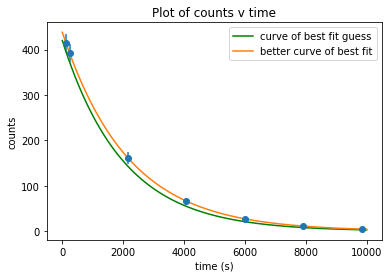

In [10]:
# this is the solution for radioactive decay

data2=np.loadtxt('C:/Users/tiern/OneDrive/Documents/PHYC30320/Data Analysis exercises/counts.dat')
t=data2[:,0]
cts=data2[:,1]

def expfunc(x, a, b):
    return a*np.exp(b*x)

#curve of best fit guess
expguess=np.array([420,-0.0005])
xexp=np.linspace(0,10000,100)
yexp=expfunc(xexp, expguess[0], expguess[1])

#actual curve of best fit
cts_err=np.sqrt(cts)
exppopt, exppcov=curve_fit(expfunc, t, cts, p0=expguess, sigma=cts_err, absolute_sigma=True)
yfitexp=expfunc(xexp, exppopt[0], exppopt[1])

plt.errorbar(t,cts,yerr=cts_err,fmt='o')
plt.plot(xexp,yexp, 'g' ,label='curve of best fit guess')
plt.plot(xexp,yfitexp, label='better curve of best fit')
plt.xlabel('time (s)')
plt.ylabel('counts')
plt.title('Plot of counts v time')
plt.legend();

In [11]:
def chi2expfunc(x,y,yerr):
    yexpected=expfunc(x, exppopt[0], exppopt[1])
    return np.sum(np.square((y-yexpected)/yerr))

chi2exp=chi2expfunc(t,cts,cts_err)  # chi2 value
vexp=len(cts)-2   # number of constraints = 2
rchi2exp=chi2exp/vexp # reduced chi2 value
Pexp=chi2.sf(chi2exp, vexp) # P value

print('chi2=' ,chi2exp)
print('reduced chi2=' ,rchi2exp)
print('P-value=' ,Pexp)

chi2= 0.03882797817840844
reduced chi2= 0.007765595635681688
P-value= 0.9999844155299081


We find that our chi2 value is very low. The reduced chi2 value is much less than 1, this suggests that our error bars may have been overestimated. The P value is very close 1 which means that the curve is effectively a perfect match for the data. Any difference between the two would only be due to chance.

## 6) Concluding Remarks:

Now you should be able to:
1. Use _scipy optimize.curvefit_ to do least squares fitting to arbitrary functions. 
2. Appreciate the importance of weighted a fit to experimental data buy the uncertainty in the points & be able to use
_scipy optimize.curvefit_ to carry out such a fit.
3. Understand the significance of $\chi^2$, the reduced $\chi^2$, and the $\chi^2$ P-value.